## import library

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

In [4]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)
### 

In [5]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [6]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image. 
### when value is close to 0 : dark 
### when value is close to 255 : white

In [7]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset



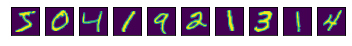


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [8]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])



## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [9]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

2022-06-11 03:45:39.975395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-06-11 03:45:39.975472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-06-11 03:45:39.975522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-06-11 03:45:39.975566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library

# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [11]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 




In [12]:
model = select_model(1)

## If you want to see information of model, model.summary() will help
### summary() is also built in function 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [15]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6536 - accuracy: 0.9405
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0845 - accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0681 - accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0583 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0513 - accuracy: 0.9840


## Test Step 
## Perform Test with Test data 

In [16]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 2s - loss: 0.1191 - accuracy: 0.9737 - 2s/epoch - 6ms/step

Test loss :  0.1191052719950676
Test accuracy : 0.9736999869346619


## Before prediction, change test image's type to float 32. 

In [17]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 4ms/step


In [18]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


## Functions for plot images, probability

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

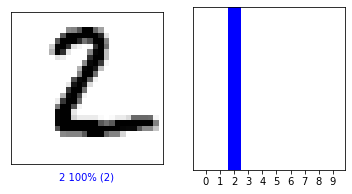

In [21]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

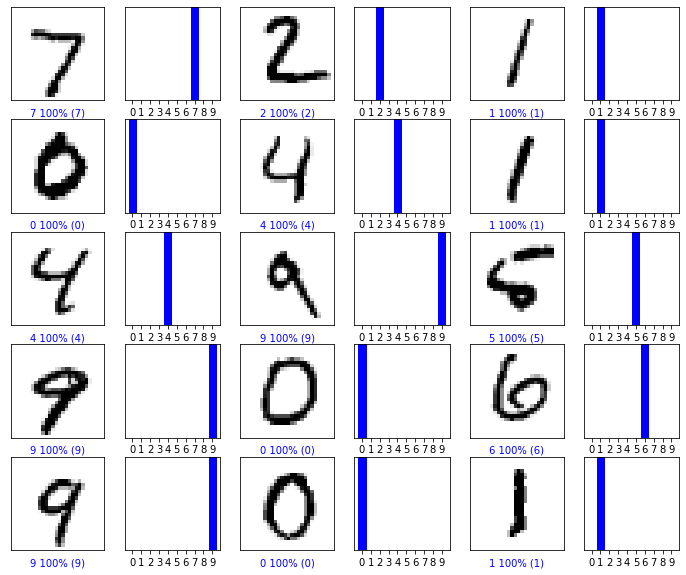

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [37]:
def error_mnist(pred, test_labels):
    pred_index = np.argmax(pred, axis=1)
    wrong_index = ((pred_index == test_labels) == False)
    wrong_index_ret = []
    for i in range(len(wrong_index)):
        if wrong_index[i] == True :
            wrong_index_ret.append(i)
    return wrong_index_ret

In [38]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[62, 115, 139, 247, 266, 321, 362, 404, 435, 443]


In [42]:
def plot_error(index_slice, pred, test_labels):
    num_rows = 2
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(10):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(index_slice[i], pred, test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(index_slice[i], pred, test_labels)
    plt.show()

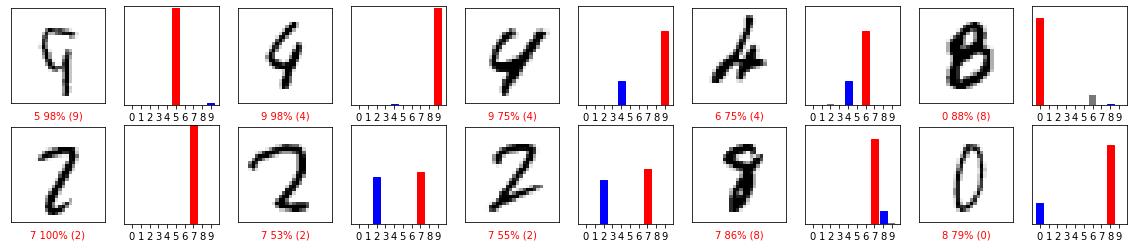

In [43]:
plot_error(index_slice, pred, test_labels)

## Model 2

In [44]:
model = select_model(2)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(train_images, train_labels,  epochs = 5)

test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]



Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3804 - accuracy: 0.9420
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0737 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0582 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0521 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0453 - accuracy: 0.9862
313/313 - 2s - loss: 0.0578 - accuracy: 0.9838 - 2s/epoch - 6ms/step

Test loss :  0.05777573212981224
Test accuracy : 0.9837999939918518
313/313 [==============================] - 2s 6ms/step


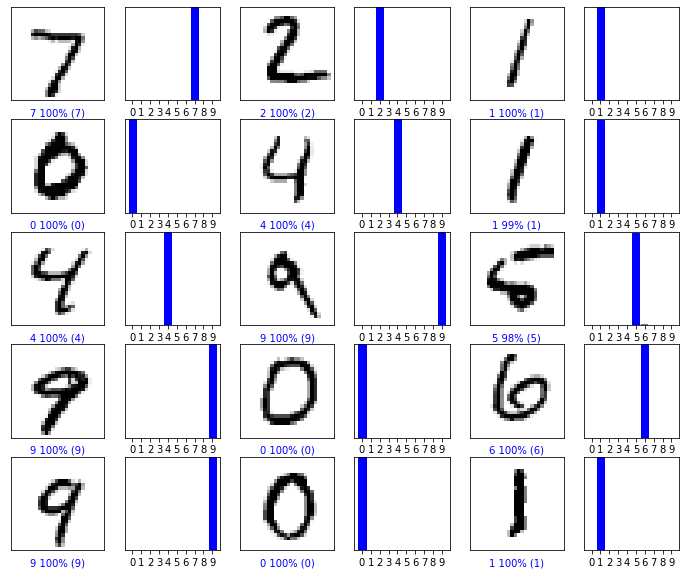

In [45]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

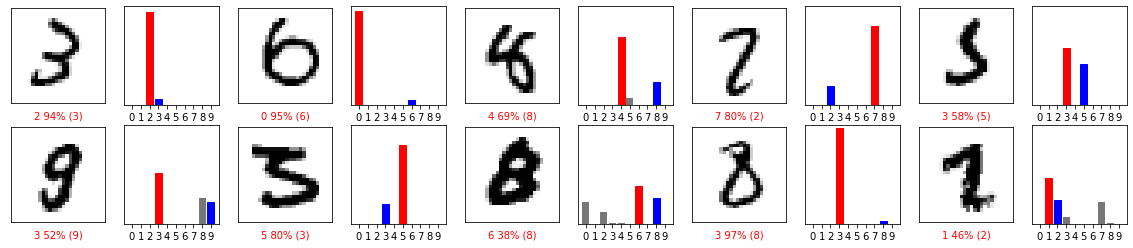

In [46]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]

plot_error(index_slice, pred, test_labels)

## Model 3

In [47]:
model = select_model(3)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(train_images, train_labels,  epochs = 5)

test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]



Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1829 - accuracy: 0.9553
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0553 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0342 - accuracy: 0.9900
313/313 - 3s - loss: 0.0361 - accuracy: 0.9894 - 3s/epoch - 10ms/step

Test loss :  0.036076776683330536
Test accuracy : 0.9894000291824341
313/313 [==============================] - 3s 9ms/step


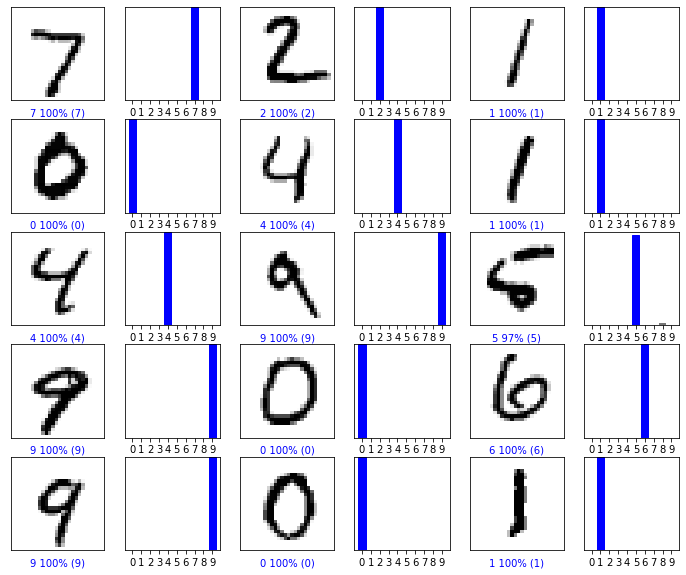

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

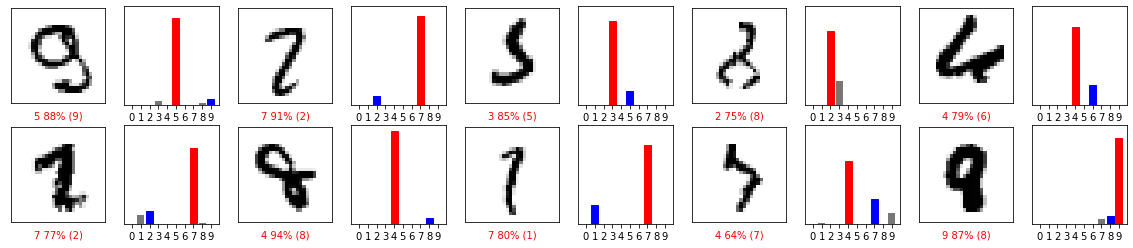

In [49]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]

plot_error(index_slice, pred, test_labels)